<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/Spiral_dataset_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, there are 2 solved problems related to some datasets that are not linearly separable. We show that ANNs with more than one hidden layer can tackle non-linear problems.<br>
At the end of this notebook, there is an extra exercise illustrating the spars_categorical_crossentropy loss. 

# Exercise 1 : Spiral dataset with 2 classes
This example is inspired from https://cs231n.github.io/neural-networks-case-study/<br>
In this exercise, we are in the case of a non linearly separable problem.First, you have to run the cell below to create the dataset and to draw the dataset. We have some red points (label y=1) and some blue points (label y=0). Our goal is to construct a classifier to predict the color of a point.

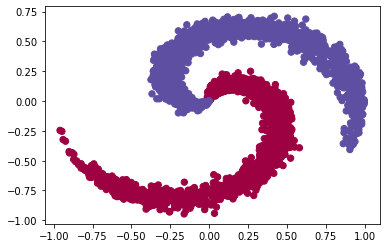

In [37]:
import numpy as np
import matplotlib.pyplot as plt
N = 1800 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
Y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

1) What is the bacth-size of this problem? What is the shape of X and Y?

In [38]:
print("the batch size is: "+str(X.shape[0]))
print("the shape of X :"+str(X.shape))
print("the shape of Y :"+str(Y.shape))

the batch size is: 3600
the shape of X :(3600, 2)
the shape of Y :(3600,)


2) The goal of this exercise is to design a Neural network to predict the label of y. How many distinct labels do we have ?

In [39]:
print("the labels are: "+str(np.unique(Y)))
print("we have "+str(len(np.unique(Y)))+" distinct values")

the labels are: [0 1]
we have 2 distinct values


3) Split X, Y into a train set and a test set using train_test_split from the sklearn package.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

4) In this question you have to use the package tensorflow.keras to build a Neural network with the architecture:
    
    * InputLayer 
    * Dense layer with 10 units and activation='tanh'.
    * BatchNormalization()
    * Dense layer with 5 units and activation='tanh'.
    * BatchNormalization()
    * Dense layer with 1 units ,activation='sigmoid'


In [41]:
from tensorflow.keras.layers import Dense, BatchNormalization,InputLayer  
from tensorflow.keras.models import Sequential 

model = Sequential([InputLayer(input_shape=(X.shape[1],)),
                    Dense(10,activation='tanh',name='first_hidden'),
                    BatchNormalization(),
                    Dense(5,activation='tanh',name='second_hidden'),
                    BatchNormalization(),
                    Dense(1,activation='sigmoid')])

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit(X_train,y_train,epochs=400,verbose=0)
#model.evaluate(X_test, y_test)

5) Compile and train the model you've just built in the previous question. Compute the accuracy score of the test set.

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=400,verbose=0)
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9857


[0.0, 0.9856902360916138]

6)Save your model in a h5 file.

In [43]:
model.save("./my_h5_model.h5")

7)Load the model you've just saved.

In [44]:
from tensorflow.keras.models import load_model
reconstructed_model = load_model("./my_h5_model.h5")
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 10)                30        
                                                                 
 batch_normalization_6 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 second_hidden (Dense)       (None, 5)                 55        
                                                                 
 batch_normalization_7 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 121
Non-trainable 

8)Get the weights from the first_hidden layer.

In [45]:
model.layers[0].get_weights() 
model.get_layer('first_hidden').get_weights()

[array([[ 1.1831646 ,  1.7340038 ,  0.05309166, -0.64837813,  0.41580105,
          0.17984025, -0.1283305 , -0.02259362, 12.542652  ,  0.25872484],
        [-0.08123869,  7.5114284 ,  0.18053956,  1.5111318 ,  0.20524457,
          0.3493049 , -0.2664295 , -0.14073546,  3.3941014 ,  0.52527577]],
       dtype=float32),
 array([-2.3824832 , -0.05298878, -1.0676888 , -1.3703289 , -1.7134192 ,
        -0.87996656,  1.2436786 ,  0.7609811 , -0.07540481, -0.4175145 ],
       dtype=float32)]

# Exercise 2 : Spiral dataset with 3 classes
This exercise is inspired from https://cs231n.github.io/neural-networks-case-study/<br>
A teacher trained a keras model over a dataset that is not easily linearly separable. Run the cell below to generate a dataset close to the one used for the model trained by the teacher. There are three classes in that dataset distinguishable by their color.

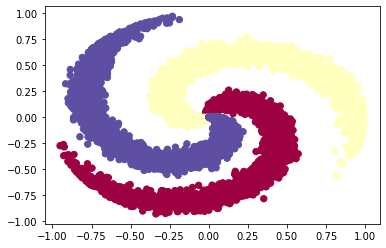

In [47]:
import numpy as np
import matplotlib.pyplot as plt
N = 3500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In the spiral dataset we've just created, we have 3 classes   

The teacher saved his model using the h5 format. Run the cell below to load the model.

In [12]:
import requests, io
import numpy as np
from tensorflow.keras.models import load_model
import h5py
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/teacher_model.h5"

r = requests.get(url)
teach_model = h5py.File(io.BytesIO(r.content),'r')
teacher_model = load_model(teach_model)

Teacher_model is a tensorflow.keras model. The output of the cell below means the model is a Sequential one. Our goal is to guess how the teacher designed his model. 

In [3]:
type(teacher_model)

keras.engine.sequential.Sequential

1) How many Dense Layers does teacher_model has? How many BatchNormalization() layer does this model have? How many Trainable params dose this model have? How many units does the last hidden layer have?

In [19]:
#1) How many Dense Layers does teacher_model has? answer : 4 Dense layers
#How many BatchNormalization() layer does this model have?  answer : 2 BatchNormalization layers
#How many Trainable params dose this model have? answer : 163 trainables parameters
#How many units does the last hidden layer have? answer : 3 units
teacher_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 10)                30        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 second_hidden (Dense)       (None, 5)                 55        
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 third_hidden (Dense)        (None, 5)                 30        
                                                                 
 dense (Dense)               (None, 3)                 1

2) What is the weight matrix of the third hidden layer ?

In [20]:
#model.layers[0].get_weights() 
teacher_model.get_layer('third_hidden').get_weights()

[array([[ 0.74147016, -0.7957535 ,  0.67191696,  0.8986576 ,  0.18083209],
        [-1.4566284 , -0.9861701 ,  0.8741859 ,  0.08478148, -1.8854285 ],
        [ 0.03102238,  0.5847911 , -0.75338507,  0.5877253 ,  0.9950492 ],
        [ 0.9523286 , -0.48159003,  1.5990696 ,  1.0915468 , -0.37100694],
        [-0.31160182,  0.3829333 ,  0.4370279 ,  0.88894445,  0.41969505]],
       dtype=float32),
 array([-0.73652726,  0.43306306, -0.52848864,  0.9140984 , -0.63914084],
       dtype=float32)]

3) Make a prediction over np.array([[5.74323982e-05 ,5.68699218e-04]] using teacher_model. What kind of vector does this prediction return?

In [22]:
teacher_model.predict(np.array([[5.74323982e-05 ,5.68699218e-04]]))
#What kind of vector does this prediction return? answer : probability vector

array([[0.0786705 , 0.5829136 , 0.33841586]], dtype=float32)

4) Try to build a neural network close to the teacher_model? You have to build it, to compile it. You have to train your neural network with the datset you've generated at the begining of this exercise.

We will use loss='categorical_crossentropy' and we have 3 classes. We have to convert y to a binary class matrix.

In [27]:
from tensorflow.keras.utils import to_categorical
Y_cat = to_categorical(y,num_classes=3)

In [23]:
from tensorflow.keras.layers import Dense, BatchNormalization,InputLayer  
from tensorflow.keras.models import Sequential 
#from tensorflow.keras.utils import to_categorical
#Y_cat = to_categorical(y,num_classes=3)

model = Sequential([InputLayer(input_shape=(X.shape[1],)),
                    Dense(10,activation='tanh',name='first_hidden'),
                    BatchNormalization(),
                    Dense(5,activation='tanh',name='second_hidden'),
                    BatchNormalization(),
                    Dense(5,activation='tanh',name='third_hidden'),
                    Dense(3,activation='softmax')])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X,Y_cat,epochs=400,verbose=0)
model.evaluate(X, Y_cat)

329/329 [==============================] - 1s 1ms/step - loss: 0.0111 - accuracy: 0.9971


[0.011100897565484047, 0.9971428513526917]

# Example 3 : sparse categorical crossentropy loss over 4 classes spiral dataset


Training a neural network involves passing data forward, through a model, and comparing predictions with ground truth labels. This comparison is done by a loss function. In multiclass classification problems, **categorical crossentropy** loss is the loss function of choice. However, it requires that your labels are one-hot encoded, which is not always the case.<br><br>

In that case, **sparse categorical crossentropy** loss can be a good choice. This loss function performs the same type of loss – categorical crossentropy loss – but works on integer targets instead of one-hot encoded ones. Saves you that to_categorical step which is common with TensorFlow/Keras models!<br><br>

In this exercise, we use sparse categorical cross-entropy loss to make a classifier over a 4 classes spiral dataset. Run the cell below to create the data.



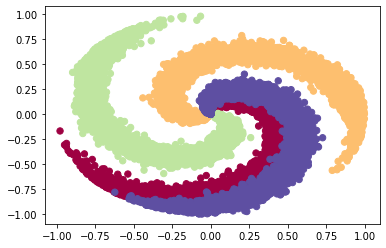

In [53]:
import numpy as np
import matplotlib.pyplot as plt
N = 4000 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Our target is an integer value from { 0, 1, 2, 3 }.

In [96]:
np.unique(y)

array([0, 1, 2, 3], dtype=uint8)

When we use categorical crossentropy loss, we’ll have to convert our target into categorical format first – with one-hot encoding, or to_categorical in Keras. We’ll effectively transform your targets into this:
* For class 0: [1,0,0,0]
* For class 1: [0,1,0,0]
* For class 2: [0,0,1,0]
* For class 3: [0,0,0,1]

However, when we have integer targets instead of categorical vectors as targets, we can use sparse categorical crossentropy. It’s an integer-based version of the categorical crossentropy loss function, which means that we don’t have to convert the targets into categorical format anymore.

**In the cell below we define a model that handles our classification problem.**<br><br> 

We have to notice our last Dense responsible for output a probability vector has 4+1 units. Generally, when we want to use sparse categorical, the last Dense layer has n+1 units, where n equals the unique number of classes in our dataset.

In [79]:
from tensorflow.keras.layers import Dense, BatchNormalization 
from tensorflow.keras.models import Sequential

model_3 = Sequential()
model_3.add(Dense(10,activation='tanh',input_shape=(X.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(Dense(10,activation='tanh'))
model_3.add(BatchNormalization())
model_3.add(Dense(5,activation='tanh'))
model_3.add(BatchNormalization())
model_3.add(Dense(5,activation='softmax'))

**Now, we compile our model with SparseCategoricalCrossentropy**:

In [80]:
import tensorflow as tf
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',\
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

**We split X, Y into a train set and a test set using train_test_split from the sklearn package.**

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**We fit our model with 400 epochs:**

In [82]:
model_3.fit(X_train,y_train,epochs=400,verbose=0)
#model_3.evaluate(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


**We evaluate our model over the test set**

In [98]:
model_3.evaluate(X_test,y_test)

165/165 [==============================] - 1s 8ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9566


[0.12005665153265, 0.9566287994384766]

**We apply our model to a new sample:**
  * we pass our new sample to the model
  * we find the predicted class 

In [99]:
vect_proba = model_3.predict(X_test[10].reshape(1,2))
vect_proba

array([[1.1520664e-06, 1.0422052e-07, 9.9999869e-01, 1.2430806e-08,
        5.2563655e-11]], dtype=float32)

In [103]:
import numpy as np
predicted_class = np.argmax(vect_proba)
print("The true label is: "+str(y_test[10]))
print("The predicted label is: "+str(predicted_class))

The true label is: 2
The predicted label is: 2
